<a href="https://colab.research.google.com/github/KumaTelila/sync-intern/blob/master/face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

In [2]:
# configuring the path of kaggle.json file

!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 96% 156M/163M [00:02<00:00, 87.5MB/s]
100% 163M/163M [00:02<00:00, 77.0MB/s]


In [4]:
# extracting the compressed file 
from zipfile import ZipFile
dataset = "/content/face-mask-dataset.zip"
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("successfully extracted")

successfully extracted


#imorting all nessecary librarys

In [5]:
import os
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2
import glob
import tensorflow as tf
import keras

#creating labels for two classes of images

In [8]:
filenames_with_mask = os.listdir('/content/data/with_mask')
filenames_without_mask = os.listdir('/content/data/without_mask')
with_mask_labels = [1]*len(filenames_with_mask)
without_mask_labels = [0]*len(filenames_without_mask)

In [9]:
print(with_mask_labels, '\n', len(with_mask_labels))
print(without_mask_labels, '\n', len(without_mask_labels))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [10]:
labels = with_mask_labels + without_mask_labels
print(len(labels))

7553




*   1 --> with mask
*   0 --> without mask



understanding the image dataset


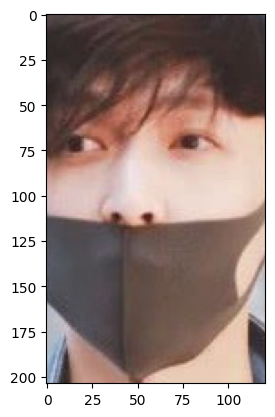

In [11]:
# displaying with mask image
img_with_mask = mpimg.imread('/content/data/with_mask/with_mask_1001.jpg')
plt.imshow(img_with_mask)

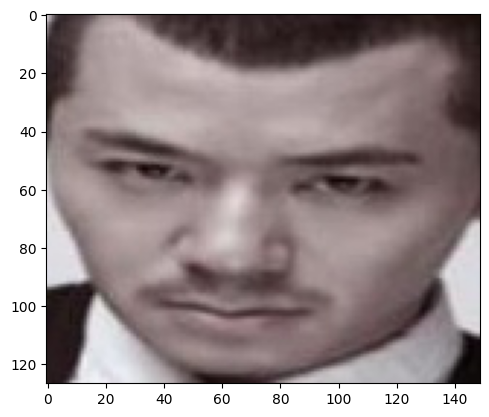

In [12]:
# displaying without mask image
img_without_mask = mpimg.imread('/content/data/without_mask/without_mask_100.jpg')
plt.imshow(img_without_mask)

#Resizing all images and saving into different folders

In [13]:
# creating directory for resized images
os.mkdir('with_mask_resized')
os.mkdir('without_mask_resized')

In [14]:
# resize with mask images

with_mask_folder = '/content/data/with_mask'
with_mask_resized_folder = '/content/with_mask_resized'

for filename in os.listdir(with_mask_folder):
  img_path = with_mask_folder+ '/' + filename
  img  = Image.open(img_path)
  img = img.resize((128, 128))
  img = img.convert('RGB')

  new_img_path = with_mask_resized_folder + '/' + filename
  img.save(new_img_path)


/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [15]:
# resize with mask images

without_mask_folder = '/content/data/without_mask'
without_mask_resized_folder = '/content/without_mask_resized'

for filename in os.listdir(without_mask_folder):
  img_path = without_mask_folder+ '/' + filename
  img  = Image.open(img_path)
  img = img.resize((128, 128))
  img = img.convert('RGB')

  new_img_path = without_mask_resized_folder + '/' + filename
  img.save(new_img_path)


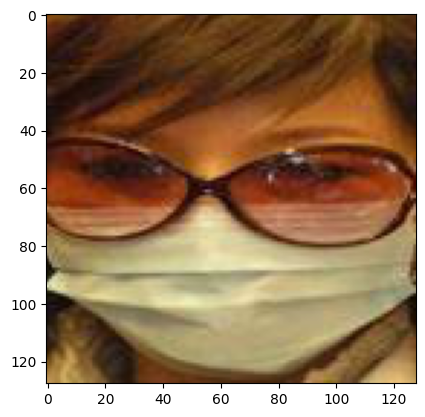

In [16]:
img_with_mask = mpimg.imread('/content/with_mask_resized/with_mask_10.jpg')
plt.imshow(img_with_mask)

# Convert images to numpy array 

In [17]:
# reading with mask images

imdir = '/content/with_mask_resized/'

ext = ['png', 'jpg']

files = []
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]

with_mask_images = np.asarray([cv2.imread(file) for file in files])

In [18]:
# reading without mask images

imdir = '/content/without_mask_resized/'

ext = ['png', 'jpg']

files = []
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]

without_mask_images = np.asarray([cv2.imread(file) for file in files])

In [19]:
print(with_mask_images.shape)
print(without_mask_images.shape)

(3725, 128, 128, 3)
(3828, 128, 128, 3)


In [20]:
compined_images = np.concatenate((with_mask_images, without_mask_images))

In [21]:
print(compined_images.shape)

(7553, 128, 128, 3)


#data and labels

In [22]:
X = compined_images
Y = np.asarray(labels)

#Train test split datasets

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [24]:
# normalizing our datasets

X_train =X_train/255
X_test = X_test/255


In [25]:
X_train

array([[[[0.44705882, 0.27058824, 0.21568627],
         [0.45490196, 0.27843137, 0.22352941],
         [0.4627451 , 0.29411765, 0.23529412],
         ...,
         [0.12941176, 0.10980392, 0.10588235],
         [0.1372549 , 0.10588235, 0.10588235],
         [0.1372549 , 0.10588235, 0.10588235]],

        [[0.45098039, 0.2745098 , 0.21960784],
         [0.44705882, 0.27843137, 0.21960784],
         [0.44705882, 0.27843137, 0.21960784],
         ...,
         [0.12941176, 0.10980392, 0.10588235],
         [0.1372549 , 0.10588235, 0.10588235],
         [0.1372549 , 0.10588235, 0.10588235]],

        [[0.44313725, 0.27058824, 0.21960784],
         [0.43137255, 0.26666667, 0.21568627],
         [0.42352941, 0.25882353, 0.20784314],
         ...,
         [0.12156863, 0.09803922, 0.10196078],
         [0.1254902 , 0.10196078, 0.10588235],
         [0.1254902 , 0.10196078, 0.10588235]],

        ...,

        [[0.15686275, 0.12156863, 0.10980392],
         [0.16862745, 0.13333333, 0.12156863]

#Building the neural network


In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (128, 128, 3)),
    keras.layers.Dense(70, activation = 'relu'),
    keras.layers.Dense(70, activation = 'relu'),
    keras.layers.Dense(2, activation = 'sigmoid')
])

In [27]:
model.compile(optimizer='adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

In [28]:
model.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
189/189 [==============================] - 12s 57ms/step - loss: 0.9313 - accuracy: 0.7337
Epoch 2/10
189/189 [==============================] - 11s 57ms/step - loss: 0.5666 - accuracy: 0.7857
Epoch 3/10
189/189 [==============================] - 12s 63ms/step - loss: 0.3966 - accuracy: 0.8332
Epoch 4/10
189/189 [==============================] - 11s 57ms/step - loss: 0.3664 - accuracy: 0.8524
Epoch 5/10
189/189 [==============================] - 11s 57ms/step - loss: 0.3508 - accuracy: 0.8608
Epoch 6/10
189/189 [==============================] - 11s 59ms/step - loss: 0.3158 - accuracy: 0.8740
Epoch 7/10
189/189 [==============================] - 10s 54ms/step - loss: 0.3252 - accuracy: 0.8736
Epoch 8/10
189/189 [==============================] - 11s 58ms/step - loss: 0.3218 - accuracy: 0.8717
Epoch 9/10
189/189 [==============================] - 11s 58ms/step - loss: 0.2694 - accuracy: 0.8941
Epoch 10/10
189/189 [==============================] - 11s 58ms/step - loss: 0.265

In [29]:
score, acc = model.evaluate(X_test, Y_test)
print("loss: ", score)
print("accuracy: ", acc)

48/48 [==============================] - 1s 12ms/step - loss: 0.2915 - accuracy: 0.8882
loss:  0.29152655601501465
accuracy:  0.8881535530090332


Building the predictive system 

In [30]:
from google.colab.patches import cv2_imshow

Path of image you want to predicted: /content/with mask.jpg


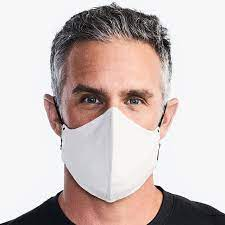

1/1 [==============================] - 0s 25ms/step
with mask


In [32]:
img_path = input("Path of image you want to predicted: ")
img_path = cv2.imread(img_path)
cv2_imshow(img_path)

img_resize = cv2.resize(img_path, (128, 128))/255
img_reshape = np.reshape(img_resize, [1, 128, 128, 3])

img_prediction = model.predict(img_reshape)

img_pred_label = np.argmax(img_prediction)

if img_pred_label == 1:
  print("with mask")
else:
  print("with out mask")

